In [1]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

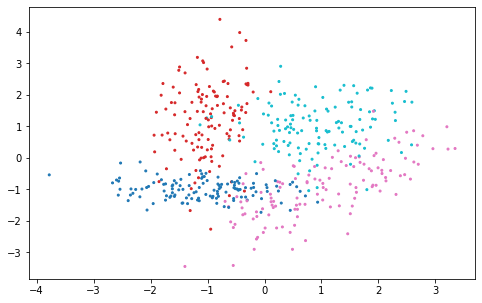

In [2]:
X, y = make_classification(
    n_samples = 500,
    n_features = 2, 
    n_classes = 4,
    n_clusters_per_class = 1,
    n_informative = 2,
    n_redundant = 0,
    random_state = 2023,
)

toy_data = pd.DataFrame(
    np.concatenate([X, y[:, np.newaxis]], 1),
    columns = ['x1','x2','y']
)


fig,ax = plt.subplots(figsize = (8,5))
ax.scatter(data = toy_data, x = 'x1', y = 'x2', c = 'y', cmap = 'tab10', s = 4)

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    colors = ('red','blue','cyan','pink')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - .4
    x1_max = X[:,0].max() + .4
    x2_min = X[:,1].min() - .4
    x2_max = X[:,1].max() + .4
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    fig, ax = plt.subplots(1,1,figsize = (8, 5))
    
    ax.contourf(xx1,xx2,Z,alpha=0.2,cmap = color_Map)
    ax.set_xlim(xx1.min(),xx1.max())
    ax.set_ylim(xx2.min(),xx2.max())
    
    # ax.scatter(*classifier.support_vectors_.transpose(), color = 'cyan', marker = 'o', alpha = .3, s = 15)
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.6, color = color_Map(idx),
                    s = 10,
                    marker = '.',
#                     markers[idx], 
                    label = cl
                   )
    fig.show()

In [4]:
from sklearn.model_selection import KFold

In [12]:
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

gnb = GNB()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
nn = MLPClassifier(solver = 'lbfgs', activation = 'relu', max_iter = 200, hidden_layer_sizes = (5, 5))
xgb = XGBClassifier(
    n_estimators = 100000,
    early_stopping_rounds = 1000,
    # gpu_id = 0,
    # tree_method = 'gpu_hist',
    learning_rate = 1e-2
)
svc = SVC(
    C = 1e+1, 
    degree = 2, 
    kernel = 'rbf',
)

[0]	validation_0-mlogloss:1.37223


C:\Users\keb20\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[1000]	validation_0-mlogloss:0.42035
[1444]	validation_0-mlogloss:0.44924


C:\Users\keb20\AppData\Local\Temp/ipykernel_16000/273856992.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\keb20\AppData\Local\Temp/ipykernel_16000/273856992.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\keb20\AppData\Local\Temp/ipykernel_16000/273856992.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\keb20\AppData\Local\Temp/ipykernel_16000/273856992.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\keb20\AppData\Local\Temp/ipykernel_16000/273856992.py:40: UserWarning: Matplotlib is currently using module

[0]	validation_0-mlogloss:1.37245


C:\Users\keb20\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[1000]	validation_0-mlogloss:0.41780
[1464]	validation_0-mlogloss:0.44645
[0]	validation_0-mlogloss:1.37197


C:\Users\keb20\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[1000]	validation_0-mlogloss:0.51703
[1407]	validation_0-mlogloss:0.53657
[0]	validation_0-mlogloss:1.37259


C:\Users\keb20\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[1000]	validation_0-mlogloss:0.62581
[1267]	validation_0-mlogloss:0.65078
[0]	validation_0-mlogloss:1.37270


C:\Users\keb20\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[1000]	validation_0-mlogloss:0.51465
[1361]	validation_0-mlogloss:0.56046


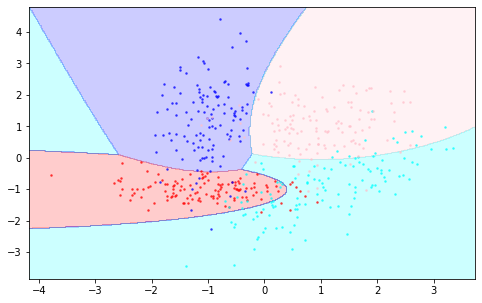

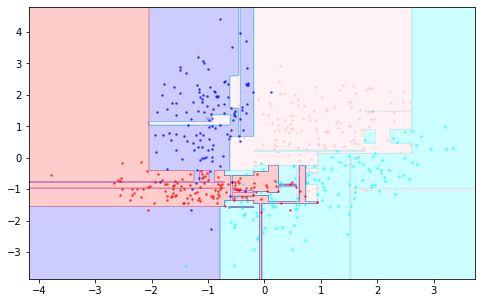

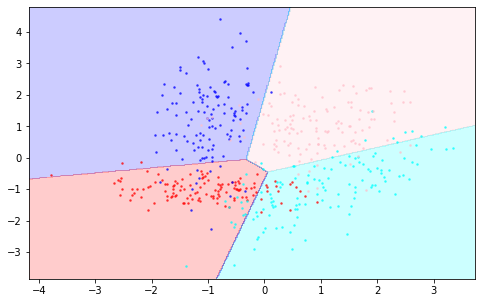

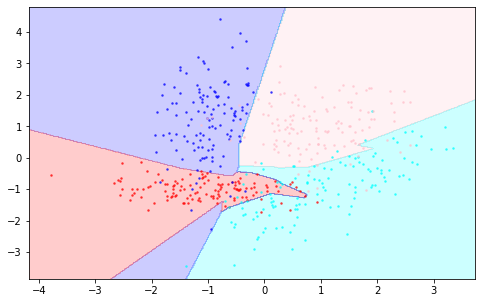

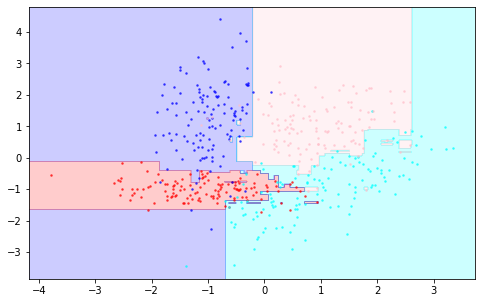

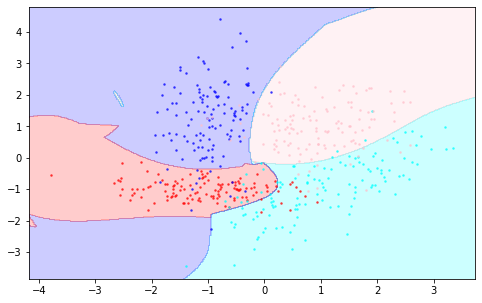

In [13]:
from sklearn.metrics import accuracy_score, f1_score

kfold = KFold(n_splits = 5, shuffle = True, random_state= 0)
gnb_acc = 0
gnb_f1 = 0
dt_acc = 0
dt_f1 = 0
lr_acc = 0
lr_f1 = 0
nn_acc = 0
nn_f1 = 0
xgb_acc = 0
xgb_f1 = 0
svc_acc = 0
svc_f1 = 0
iter = 0

for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    gnb.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    lr.fit(X_train, y_train)
    nn.fit(X_train, y_train)
    xgb.fit(X_train, y_train, eval_set = [(X_test, y_test)], verbose = 1000)
    svc.fit(X_train, y_train)

    if(iter == 0):
        plot_decision_regions(X,y,gnb)
        plot_decision_regions(X,y,dt)
        plot_decision_regions(X,y,lr)
        plot_decision_regions(X,y,nn)
        plot_decision_regions(X,y,xgb)
        plot_decision_regions(X,y,svc)
    
    iter += 1

    gnb_pred = gnb.predict(X_test)
    dt_pred = dt.predict(X_test)
    lr_pred = lr.predict(X_test)
    nn_pred = nn.predict(X_test)
    xgb_pred = xgb.predict(X_test)
    svc_pred = svc.predict(X_test)

    gnb_acc += np.round(accuracy_score(y_test, gnb_pred), 4)
    gnb_f1 += f1_score(y_test, gnb_pred, average = 'macro')

    dt_acc += np.round(accuracy_score(y_test, dt_pred), 4)
    dt_f1 += f1_score(y_test, dt_pred, average = 'macro')

    lr_acc += np.round(accuracy_score(y_test, lr_pred), 4)
    lr_f1 += f1_score(y_test, lr_pred, average = 'macro')

    nn_acc += np.round(accuracy_score(y_test, nn_pred), 4)
    nn_f1 += f1_score(y_test, nn_pred, average = 'macro')

    xgb_acc += np.round(accuracy_score(y_test, xgb_pred), 4)
    xgb_f1 += f1_score(y_test, xgb_pred, average = 'macro')

    svc_acc += np.round(accuracy_score(y_test, svc_pred), 4)
    svc_f1 += f1_score(y_test, svc_pred, average = 'macro')


In [7]:
print('Bayesian           average ACC: {:.4f} average F1: {:.4f}'.format(gnb_acc/5, gnb_f1/5))
print('Decision Tree      average ACC: {:.4f} average F1: {:.4f}'.format(dt_acc/5, dt_f1/5))
print('Logistic Regrssion average ACC: {:.4f} average F1: {:.4f}'.format(lr_acc/5, lr_f1/5))
print('Neural Network     average ACC: {:.4f} average F1: {:.4f}'.format(nn_acc/5, nn_f1/5))
print('XGBoost            average ACC: {:.4f} average F1: {:.4f}'.format(xgb_acc/5, xgb_f1/5))
print('SVC                average ACC: {:.4f} average F1: {:.4f}'.format(svc_acc/5, svc_f1/5))

Bayesian           average ACC: 0.8580 average F1: 0.8558
Decision Tree      average ACC: 0.8240 average F1: 0.8205
Logistic Regrssion average ACC: 0.8400 average F1: 0.8380
Neural Network     average ACC: 0.8100 average F1: 0.8091
XGBoost            average ACC: 0.8500 average F1: 0.8475
SVC                average ACC: 0.8700 average F1: 0.8680
